<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Practical_Learning_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: K-Means Clustering with Sklearn

## Introduction
In this notebook, we will explore K-Means clustering using the sklearn library. We will learn how to cluster a simple dataset, interpret the results, identify the optimum number of clusters, understand the issues related to local minimum convergence and centroid initialization, and explore the K-Means++ algorithm for improved centroid initialization.



## Learning Objectives
- Implement K-Means clustering using sklearn
- Interpret clustering results
- Identify the optimum number of clusters
- Understand the impact of local minimum convergence and centroid initialization
- Implement K-Means++ for improved centroid initialization



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris

#### We will generate a small synthetic dataset using make_blobs. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
# Create a small Dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=2.0)

<ipython-input-3-33cd1f5b2df1>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


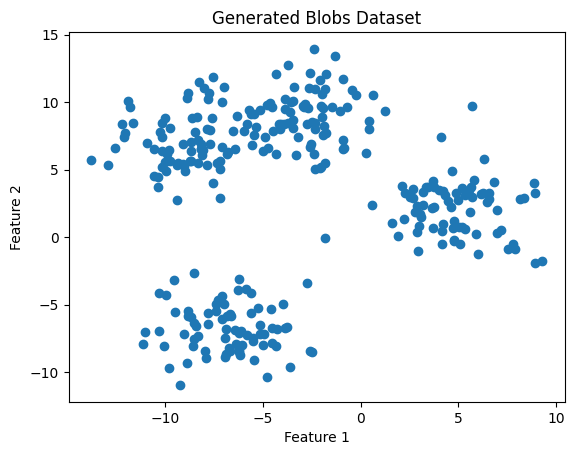

In [3]:
# Visualize Dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Blobs Dataset')
plt.show()

#### Now we will cluster this data using KMeans, for which we will use the KMeans class. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [4]:
# Implement K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

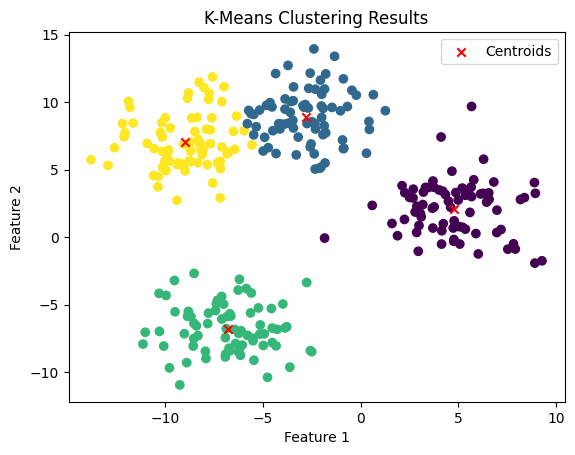

In [5]:
# Visualize Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

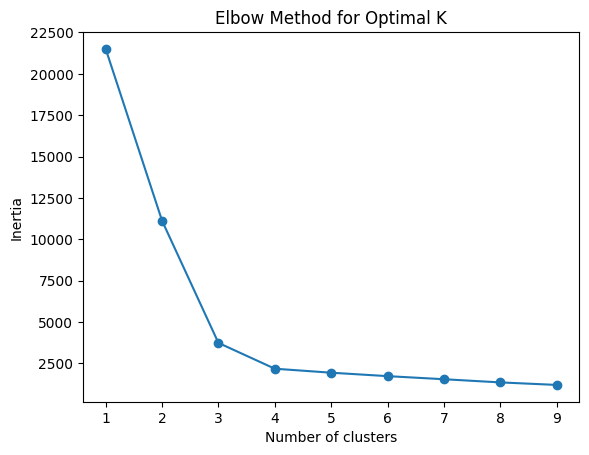

In [6]:
# Elbow Method for Optimum Number of Clusters
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## K-means vs. K-means++

<ipython-input-7-37753bd88ba8>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


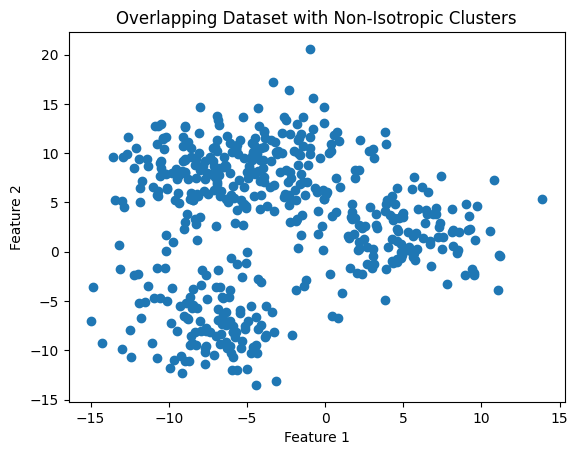

In [7]:
# Create an overlapping dataset with non-isotropic clusters
X, y = make_blobs(n_samples=500, centers=4, cluster_std=3.0, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Overlapping Dataset with Non-Isotropic Clusters')
plt.show()


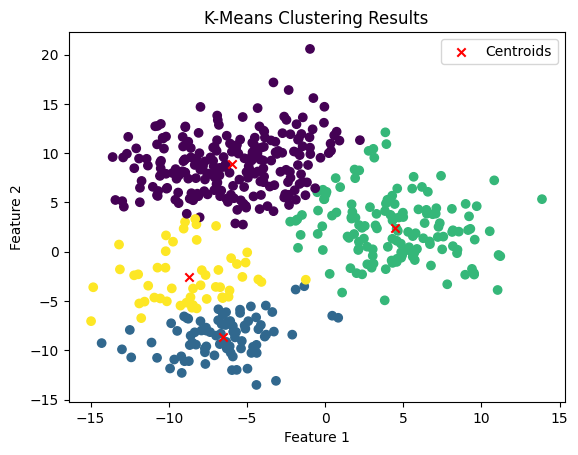

In [8]:
# Implement K-Means Clustering, with a random cluster center initialisation
kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=None)
kmeans.fit(X)

# Visualize Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

### Run the previous cell multiple times to see that each run ends in a different solution

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


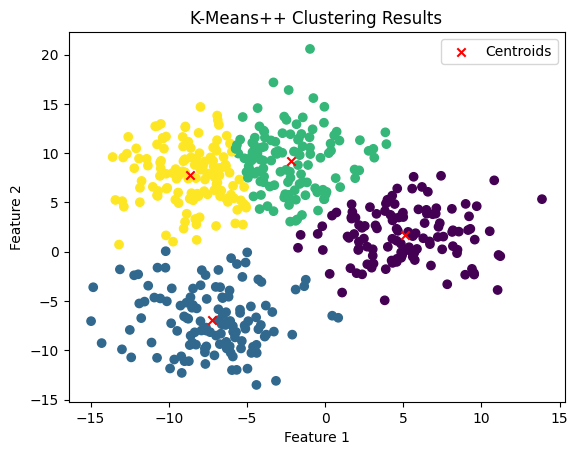

In [9]:
# K-Means++ Implementation for more stable solution
kmeans_plus_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus_plus.fit(X)

# Visualize K-Means++ Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_plus_plus.labels_, cmap='viridis')
plt.scatter(kmeans_plus_plus.cluster_centers_[:, 0], kmeans_plus_plus.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means++ Clustering Results')
plt.legend()
plt.show()

## Challenge Activity

### It is time for you to practice all of these steps on a new dataset. The iris dataset has been loaded for you (below). Please complete each cell.

In [10]:
# Practice: Iris Dataset
iris = load_iris()
X_iris = iris.data
# get column name
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
# selects the first two columns of the X_iris array and assigns them to the variable X
X = X_iris[:, :2]


<ipython-input-12-350f004d22b3>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


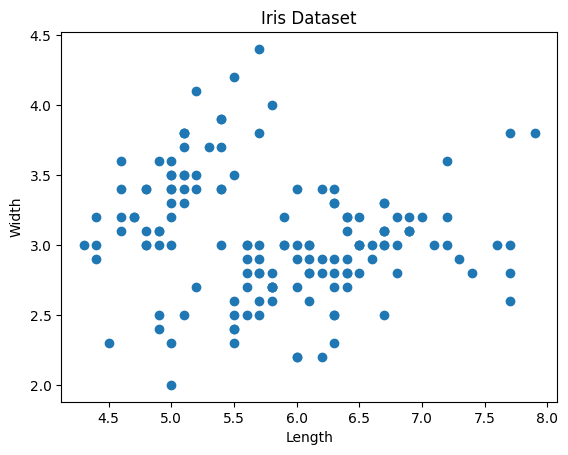

In [12]:
# Visualize the dataset as a scatter plot with xlabel as Length and yLabel as width
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris Dataset')
plt.show()



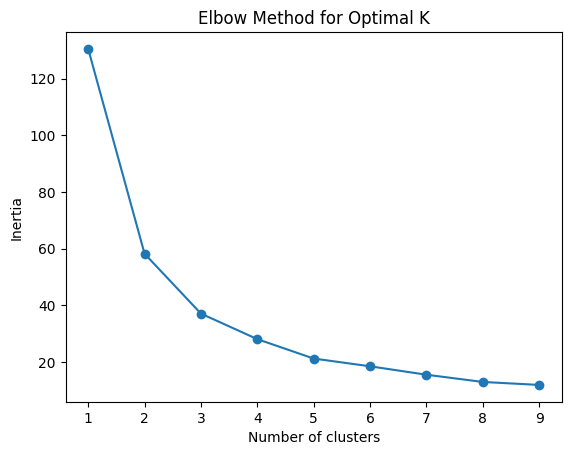

In [18]:
# Use the Elbow Method to find Optimum Number of Clusters between 1 to 10
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=1, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [20]:
# Implement K-Means Clustering using the optimum number of cluster found by the elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

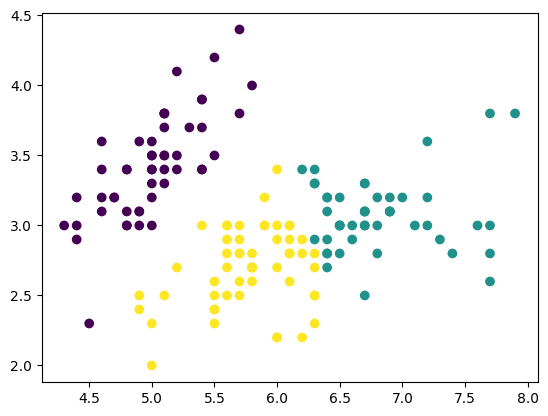

In [21]:
# Visualize the Clustering Results as a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')




## Reflection Questions

- What does the make-blobs method do?
- How can we control the overlap between the different clusters generated by the make-blobs function?
- When ran using random initialization, did the results of k-means vary betweeen different runs? Why?
- What number of clusters did you choose for iris data based on the elbow method?